#Tugas 2 Kecerdasat Artifisial


1. Menginport library dan framwork tensorflow


In [4841]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

2. Membaca dataset


In [4842]:
# Membaca dataset
data = pd.read_csv('diabetes.csv')
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

3. Memisahkan Fitur dan label


In [4843]:
# Memisahkan fitur dan label

X = data.drop('Outcome', axis=1)
y = data['Outcome']


4. Memisahkan data testing dan training

In [4844]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Menormalisasi fitur menggunakan standarScaler

In [4845]:

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

6. Membangun model

In [4846]:
# Bangun model jaringan saraf tiruan
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    # Dropout(0.5),
    # Dense(64, activation='relu'),
    
    Dense(1, activation='sigmoid')
])

7. Mengompilasi model

In [4847]:
# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



8. melatih model (menggunakan tensorboard)

In [4848]:
tensorboard_callback = TensorBoard(log_dir='./logs')

history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])



Epoch 1/5


20/20 [==============================] - 1s 13ms/step - loss: 0.7006 - accuracy: 0.5456 - val_loss: 0.6257 - val_accuracy: 0.6883
Epoch 2/5
20/20 [==============================] - 0s 5ms/step - loss: 0.5937 - accuracy: 0.7280 - val_loss: 0.5568 - val_accuracy: 0.7468
Epoch 3/5
20/20 [==============================] - 0s 5ms/step - loss: 0.5380 - accuracy: 0.7541 - val_loss: 0.5227 - val_accuracy: 0.7597
Epoch 4/5
20/20 [==============================] - 0s 5ms/step - loss: 0.5064 - accuracy: 0.7687 - val_loss: 0.5074 - val_accuracy: 0.7857
Epoch 5/5
20/20 [==============================] - 0s 5ms/step - loss: 0.4868 - accuracy: 0.7622 - val_loss: 0.4975 - val_accuracy: 0.8052


9. Melakukan prediksi pada data uji

In [4849]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

5/5 [==============================] - 0s 2ms/step


10. Menampilkan accuracy berbentuk plot

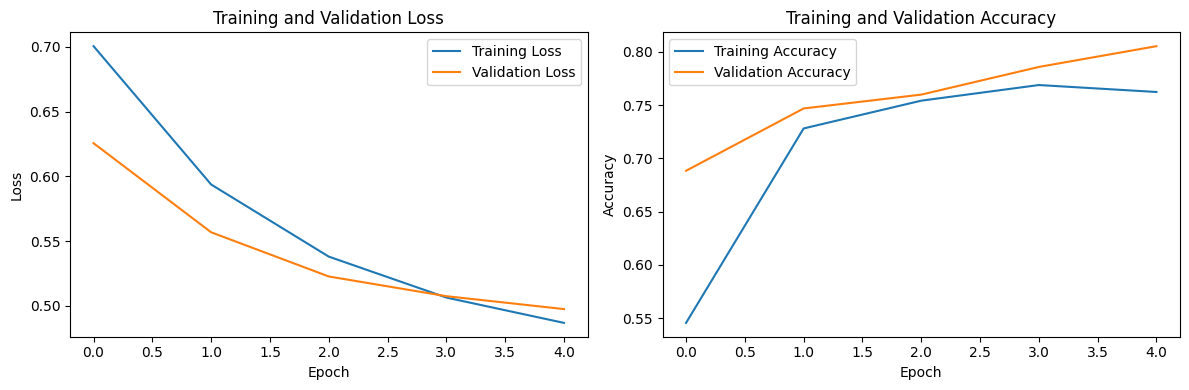

In [4850]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


11. mengevaluasi model

In [4851]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

12. Display summary

In [4852]:
# Display model summary
model.summary()

Model: "sequential_362"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1035 (Dense)          (None, 128)               1152      
                                                                 
 dense_1036 (Dense)          (None, 1)                 129       
                                                                 
Total params: 1281 (5.00 KB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


13. menampilkan accuracy dan confusion matrix

In [4853]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.8051948051948052
Confusion Matrix:
[[88 11]
 [19 36]]


In [4854]:
# Save the model to H5 file
model.save('Diabetes_model.h5')

c:\Users\Asus TUF\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
